# (automated) Exploratory Data Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/darenasc/eda/blob/main/notebooks/eda_correlcon_2024.ipynb)

[auto-fes notebook in Colab](https://colab.research.google.com/drive/1gVACEkE0hLD471-g0MyBDPgTyLE-Sw1D#scrollTo=8PSBzNCJS4Bc)



Notebook prepared for CorrelCon 2024

In [ ]:
# Run the following line if you are using Colab
# !pip install pandas ydata-profiling sweetviz pygwalker openml
# !pip install ydata_profiling tqdm numpy openpyxl pandas SQLAlchemy sqlalchemy psycopg2 pipfile nbconvert
# !pip install ucimlrepo
# !pip install git+https://github.com/darenasc/auto-fes.git

In [1]:
import pandas as pd
import pygwalker as pyg
import sweetviz as sv
from openml.datasets import get_dataset
from ydata_profiling import ProfileReport

In [2]:
# https://www.openml.org/d/40945
dataset = get_dataset(40945)

/Users/darenasc/.local/share/virtualenvs/eda-V36nnFeJ/lib/python3.10/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [3]:
print(f"{dataset.name}, {dataset.url}")

Titanic, https://api.openml.org/data/v1/download/16826755/Titanic.arff


In [4]:
df_titanic, *_ = dataset.get_data()

## pandas

In [5]:
df_titanic.head()

pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S     2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S    11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  None    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  None  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [6]:
df_titanic.tail()

pclass survived                       name     sex   age  sibsp  parch  \
1304       3        0       Zabour, Miss. Hileni  female  14.5      1      0   
1305       3        0      Zabour, Miss. Thamine  female   NaN      1      0   
1306       3        0  Zakarian, Mr. Mapriededer    male  26.5      0      0   
1307       3        0        Zakarian, Mr. Ortin    male  27.0      0      0   
1308       3        0         Zimmerman, Mr. Leo    male  29.0      0      0   

      ticket     fare cabin embarked  boat   body home.dest  
1304    2665  14.4542  None        C  None  328.0      None  
1305    2665  14.4542  None        C  None    NaN      None  
1306    2656   7.2250  None        C  None  304.0      None  
1307    2670   7.2250  None        C  None    NaN      None  
1308  315082   7.8750  None        S  None    NaN      None

In [7]:
df_titanic.shape

(1309, 14)

In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   uint8   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   uint8   
 6   parch      1309 non-null   uint8   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), object(5), uint8(3)
memory usage: 90.0+ KB


In [9]:
df_titanic.describe()

pclass          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881135     0.498854     0.385027    33.295479   
std       0.837836    14.413500     1.041658     0.865560    51.758668   
min       1.000000     0.166700     0.000000     0.000000     0.000000   
25%       2.000000    21.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    39.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

             body  
count  121.000000  
mean   160.809917  
std     97.696922  
min      1.000000  
25%     72.000000  
50%    155.000000  
75%    256.000000  
max    328.000000

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'body'}>]], dtype=object)

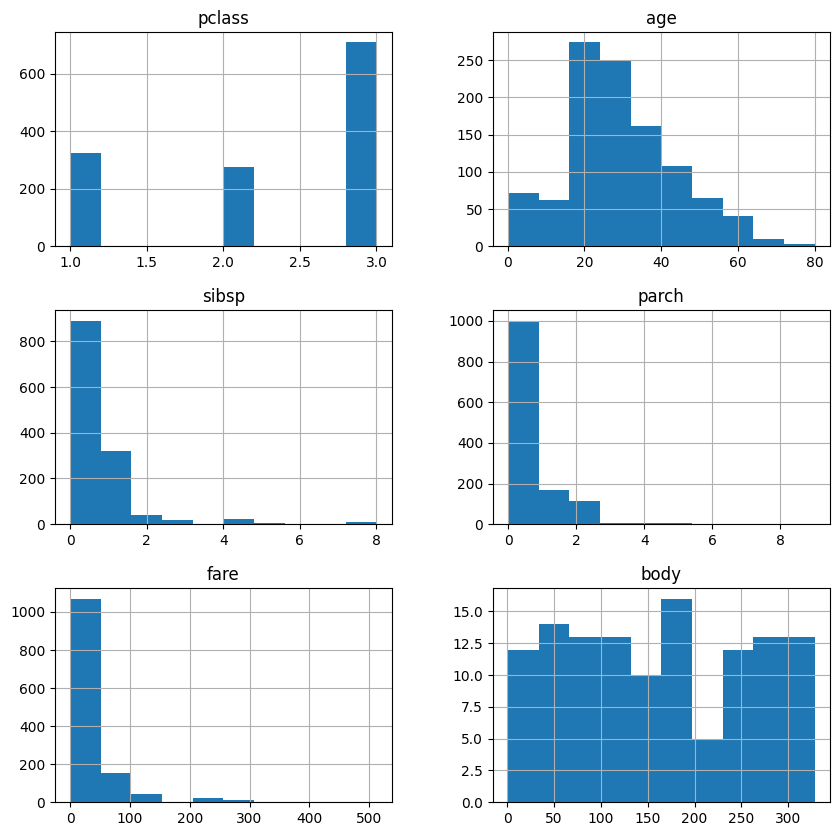

In [10]:
df_titanic.hist(figsize=(10, 10))

<Axes: >

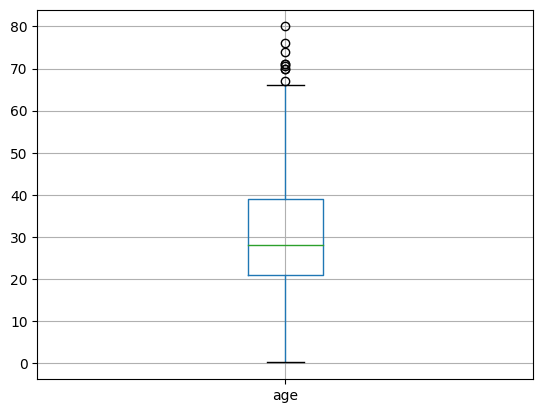

In [11]:
# df_titanic.boxplot()
df_titanic[["age"]].boxplot()
# df_titanic[["fare"]].boxplot()

### pandas html

In [12]:
# Data collection from tables using pandas
# On Mac: Press "command + space" button or open Spotlight
# type "Install Certificates.command"
url = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"
dfs = pd.read_html(url)

dfs[0].head()
# dfs[0].tail()

Country  Population (1 July 2022)  Population (1 July 2023)  Change  \
0          World                8021407192                8091734930  +0.88%   
1          India                1425423212                1438069596  +0.89%   
2       China[a]                1425179569                1422584933  −0.18%   
3  United States                 341534046                 343477335  +0.57%   
4      Indonesia                 278830529                 281190067  +0.85%   

  UN Continental Region[1] UN Statistical Subregion[1]  
0                      NaN                         NaN  
1                     Asia               Southern Asia  
2                     Asia                Eastern Asia  
3                 Americas            Northern America  
4                     Asia          South-eastern Asia

<Axes: title={'center': 'Bottom 5 countries by population'}, xlabel='Country'>

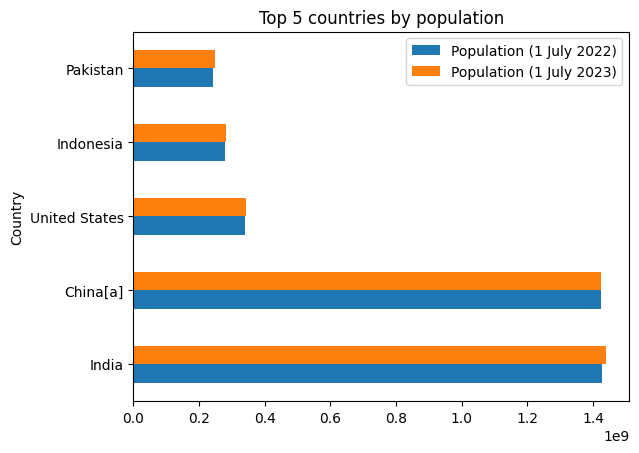

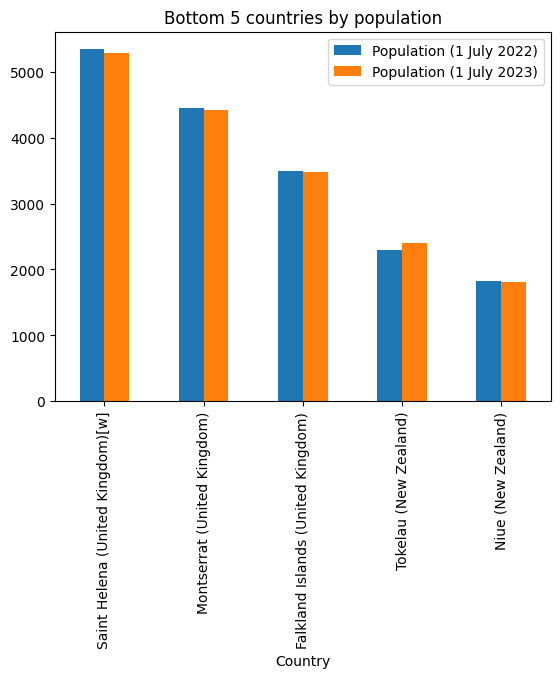

In [15]:
dfs[0]
# dfs[0].head().plot.bar(x='Country / Area')
n_countries = 5
dfs[0][1:].head(n_countries).plot(
    kind="barh",
    x="Country",
    title=f"Top {n_countries} countries by population",
)
dfs[0][:-1].sort_values(by=["Population (1 July 2023)"], ascending=False).tail(
    n_countries
).plot(
    kind="bar",
    x="Country",
    title=f"Bottom {n_countries} countries by population",
)

In [16]:
# Export to CSV
df_titanic.to_csv("../data/titanic.csv", index=False)

## SandDance (vscode extension)

Right click on a CSV file and click on "View in SandDance"

## ydata-profiling

In [17]:
profile = ProfileReport(df_titanic, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## sweetviz

In [18]:
my_report = sv.analyze(df_titanic)
my_report.show_html()  # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
# Create a bool survived target variable
df_titanic["survived_bool"] = None
for i, r in df_titanic.iterrows():
    df_titanic.at[i, "survived_bool"] = True if r["survived"] == "1" else False

In [20]:
my_report = sv.analyze(df_titanic, target_feat="survived_bool")
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## pygwalker

In [21]:
walker = pyg.walk(df_titanic)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…